# STA130 HW 8 pre lecture

### chatbot session link:https://chatgpt.com/share/673a419f-1a38-800e-8899-7c720be3de32
### chatbot summary

### **Assignment: Decision Tree Classifier for Predicting Hardcover Books**

---

#### **Objective**
The task is to:
1. Understand key concepts related to classification metrics and decision trees.
2. Train a decision tree classifier using scikit-learn to predict whether a book is a hardcover or paperback based on the "List Price" feature.

---

#### **Topics Discussed**
1. **Concepts of Classification Metrics**:
   - **Accuracy**: Overall correctness of predictions.
   - **Sensitivity (Recall)**: Proportion of true positives correctly identified.
   - **Specificity**: Proportion of true negatives correctly identified.
   - **Precision**: Proportion of predicted positives that are true positives.
   - Example scenarios where these metrics are prioritized:
     - **Sensitivity**: Cancer diagnosis to minimize missed positive cases.
     - **Precision**: Spam filtering to reduce false positives.

2. **Decision Tree Classifier**:
   - Definition: A supervised learning algorithm that splits data based on feature thresholds to classify instances.
   - Comparison with multiple linear regression:
     - Decision trees handle non-linear relationships, while linear regression assumes a linear relationship.

3. **Data Preparation**:
   - The target variable (`y`) is derived using `pd.get_dummies` to one-hot encode categorical data.
   - The feature matrix (`X`) is extracted using column selection from a pandas DataFrame.

4. **Code Implementation**:
   - Training a decision tree classifier (`DecisionTreeClassifier`) using scikit-learn.
   - Splitting data into training and testing sets using `train_test_split`.
   - Setting a `max_depth` of 2 for the classifier to control complexity.
   - Evaluating the model using `accuracy_score` and `classification_report`.

---

#### **Code Summary**
1. **Preparing the Data**:
   ```python
   y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
   X = ab_reduced_noNaN[['List Price']]
   ```

2. **Training the Model**:
   ```python
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.model_selection import train_test_split
   from sklearn.metrics import classification_report, accuracy_score

   # Split data into training and testing sets
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Initialize and train the decision tree
   clf = DecisionTreeClassifier(max_depth=2, random_state=42)
   clf.fit(X_train, y_train)

   # Evaluate the model
   y_pred = clf.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, y_pred))
   print("\nClassification Report:\n", classification_report(y_test, y_pred))
   ```

---

#### **Expected Outputs**
1. **Model Accuracy**:
   Displays the proportion of correct predictions on the test set.
2. **Classification Report**:
   Summarizes precision, recall, F1-score, and support for each class.

---

#### **Conclusion**
This assignment demonstrates the process of building a simple decision tree classifier to predict whether a book is a hardcover or paperback based on its price. The focus on using the `max_depth` parameter ensures a balance between model complexity and interpretability.


### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

classification decision tree is used for solving classification problems. it is represented with a tree structure, where the data are splited. a multiple linear regression is represented with a linear equation, it is mostly used for processing continuous data

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

##### 1. Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

accuracy is the proportion of the correct predictions. when the model wants to distinguish between apple and banana, people want the model to have more correct predictions, that is, a higher accuracy

##### 2. Sensitivity measures the proportion of actual positives that are correctly identified.

in a cancer screening case, denote positive to be when a patient has a cancer, in this case sensitivitiy is the most useful because missing cancer cases is more dangerous. a higher sensitivity of a model can ensure less missing cancer cases

##### 3. Specificity measures the proportion of actual negatives that are correctly identified.

in a case where people are trying to detect a disease, denote positive to be that a person has the disease, but the treatment for the disease would cause side effects to healthy people, specificity is the most appropreate. specificity ensures more correct predictions within healthy people, making sure less people would experience the side effects

##### 4. Precision measures the proportion of positive identifications that were actually correct.

in a case where an email company is trying to identify spam emails, denote positive to be spam, precision is the most appropreate. a higher precision ensures that less non-spam email would classified as spam, leading to a less loss of normal emails.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below
    1. remove Weight_oz, Width, and Height
    2. drop all remaining rows with NaN entries
    3. set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [2]:
# remove Weight_oz, Width, and Height
ab_reduced = ab.drop(["Weight_oz", "Height", "Width"], axis=1)
ab_reduced

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [3]:
# drop all remaining rows with NaN entries
ab_reduced_noNAN = ab_reduced.dropna()
ab_reduced_noNAN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [4]:
# set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category
ab_reduced_noNAN.loc[:,"Pub year"] = ab_reduced_noNAN["Pub year"].astype("int64")
ab_reduced_noNAN.loc[:,"NumPages"] = ab_reduced_noNAN["NumPages"].astype("int64")
ab_reduced_noNAN.loc[:,"Hard_or_Paper"] = ab_reduced_noNAN["Hard_or_Paper"].astype("category")
ab_reduced_noNAN.dtypes

Title             object
Author            object
List Price       float64
Amazon Price     float64
Hard_or_Paper     object
NumPages         float64
Publisher         object
Pub year         float64
ISBN-10           object
Thick            float64
dtype: object

### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [5]:
np.random.seed(114514)

split_size = int(ab_reduced_noNAN.shape[0]*0.8)

book_train,book_test = \
  train_test_split(ab_reduced_noNAN, train_size=split_size)
print(f"number of train data observations: {book_train.shape[0]}")
print(f"number of train data observations: {book_test.shape[0]}")

number of train data observations: 255
number of train data observations: 64


In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNAN["Hard_or_Paper"])['H']
X = ab_reduced_noNAN[['List Price']]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84375

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.91      0.89        44
        True       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]'),
 Text(0.75, 0.5, 'x[0] <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]')]

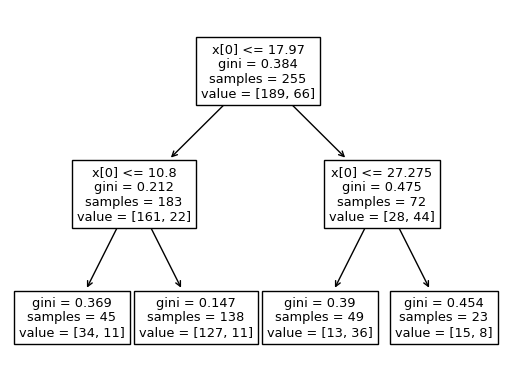

In [7]:
tree.plot_tree(clf)

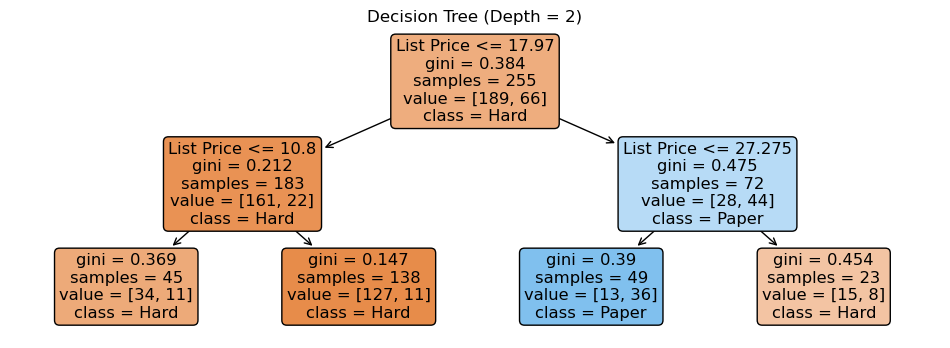

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plot_tree(clf, feature_names=["List Price"], 
          class_names=["Hard", "Paper"], 
          filled=True, rounded=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

if the list price is lower than 17.97, it is classified as Hard. If the price is between 17.97 and 27.275, it is classified as Paper. Otherwise, Hard

# STA130 HW 8 post lecture
### chatbot link:https://chatgpt.com/share/673e6c6a-2d7c-800e-aae3-15c8dca80f3d
### chatbot summary:
Here’s a concise summary of our interaction:

---

### **Topic: Working with Decision Trees in scikit-learn**

#### **Key Points Discussed:**
1. **Confusion Matrix with `DecisionTreeClassifier`**:
   - How to generate and visualize a confusion matrix using `ConfusionMatrixDisplay` in `scikit-learn`.
   - Ensuring consistent feature names between training and prediction to avoid `ValueError`.

2. **Training a `DecisionTreeClassifier`**:
   - Code and process for fitting a decision tree with three features (`NumPages`, `Thick`, and `List Price`) to produce one outcome.
   - Debugging column name mismatches by verifying and aligning feature names using `feature_names_in_`.

3. **Visualizing Feature Importances**:
   - Using the `feature_importances_` attribute of `DecisionTreeClassifier` to evaluate and visualize feature contributions.
   - Implemented bar plots with `matplotlib` and `seaborn` to display feature importance rankings clearly.

#### **Issues and Solutions:**
- **Error: Mismatch of Feature Names**:
  - Diagnosed the issue and suggested ensuring consistent column selection and alignment of feature names in training and prediction datasets.
  - Highlighted potential causes such as DataFrame vs. NumPy array conversions or formatting inconsistencies in column names.

- **Visualization Tips**:
  - Demonstrated creating clear plots to analyze model behavior and feature importance.

---

### **Outcome:**
You now have a complete workflow for:
- Training a decision tree classifier.
- Handling feature name mismatches.
- Generating and visualizing confusion matrices.
- Visualizing feature importances to understand model decision-making.

This interaction provides the necessary tools and best practices for effectively using scikit-learn’s `DecisionTreeClassifier`.

### 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

In [9]:
# Define the features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNAN["Hard_or_Paper"])['H']
X = ab_reduced_noNAN[['NumPages', 'Thick', 'List Price']]

# Split the data into training and test sets (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = clf2.predict(X_test2)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))
print("Feature names used during training:", clf2.feature_names_in_)


Accuracy: 0.859375

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.91      0.90        44
        True       0.79      0.75      0.77        20

    accuracy                           0.86        64
   macro avg       0.84      0.83      0.83        64
weighted avg       0.86      0.86      0.86        64

Feature names used during training: ['NumPages' 'Thick' 'List Price']


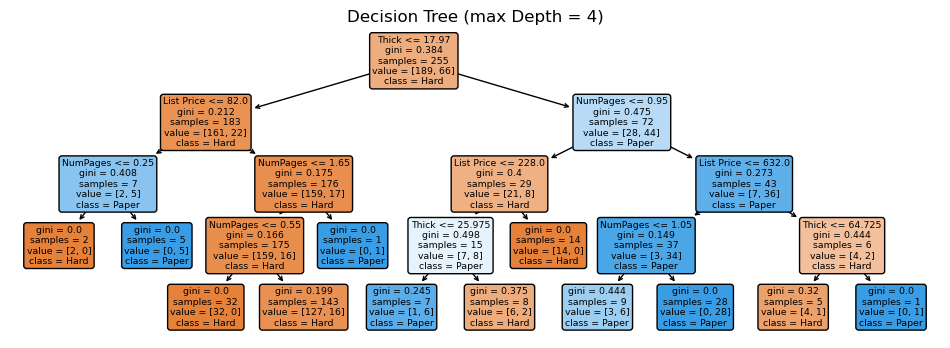

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plot_tree(clf2, feature_names=["List Price", "NumPages", "Thick"], 
          class_names=["Hard", "Paper"], 
          filled=True, rounded=True)
plt.title("Decision Tree (max Depth = 4)")
plt.show()

if the list price <= the given criterion, go the the left, otherwise go to the right, until it's at the leaf of the tree, report the class in the leaf

### 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

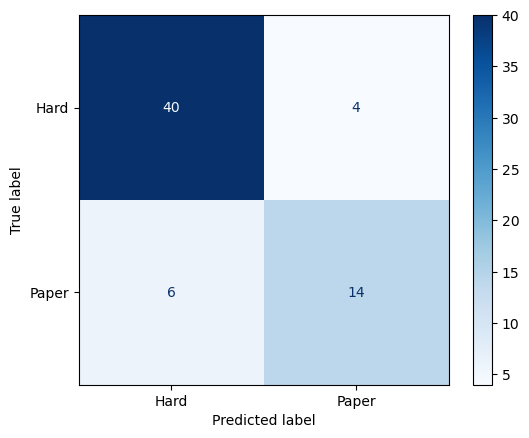

In [11]:
# clf confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hard", "Paper"])
disp.plot(cmap="Blues")  # Optional: Add a colormap

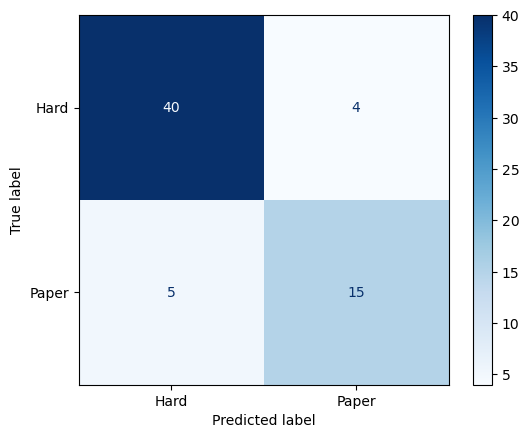

In [12]:
# clf2 confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Hard", "Paper"])
disp2.plot(cmap="Blues")  # Optional: Add a colormap

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

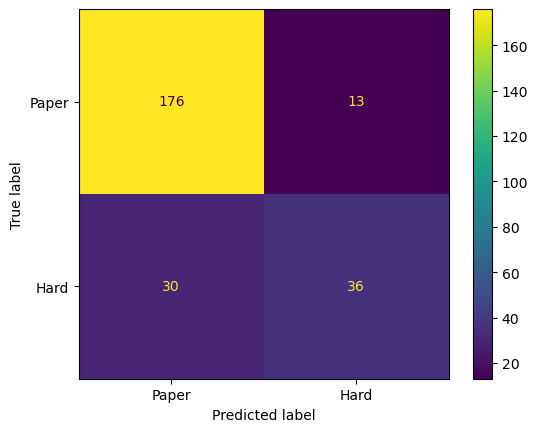

In [13]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(X_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

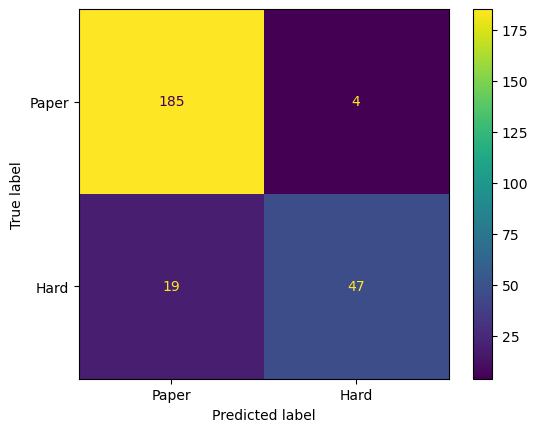

In [14]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train2, 
                     clf2.predict(
                         X_train2), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

these two confusion matrices only show the predictions using the training dataset, while the two for clf and clf2 are the ones based on the testing dataset. These confusion matrices don't show "out of sample" generalization, which we expected to perform well. The two for clf and clf2 show generalization, which is prefered over these two.

### 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

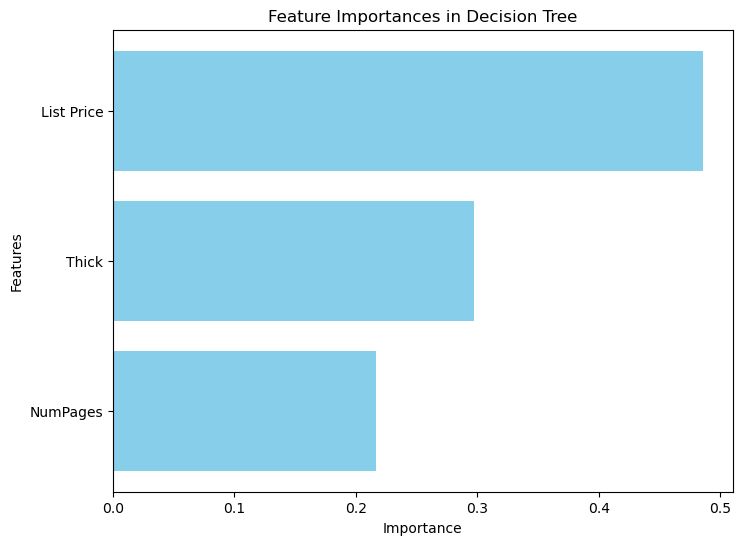

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Example feature names
feature_names = ['NumPages', 'Thick', 'List Price']

# Access feature importances
importances = clf2.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Optional: Invert y-axis for descending order
plt.show()


In [16]:
clf2.feature_names_in_

array(['NumPages', 'Thick', 'List Price'], dtype=object)

The "List Price" variable is the most important

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In a linear regression, the possible influences of the coefficient is the coefficient itself. The higher the coefficient is, the more influence it makes on the outcome. The feature importance in a decision tree repersents how much contribution does the feature make in the splitting rule of the nodes. It's not in the tree itself. It is been calculated.

### 10. yes